In [2]:
! pip install scikit-multiflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.6/450.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.5.3-cp310-cp310-linux_x86_64.whl size=1281812 sha256=3930791b86f50c2bd50fa0eabdb06f993abf8c6a286383dc3912c63521978c7f
  Stored in directory: /root/.cache/pip/wheels/6e/1b/56/45b17a6cf203d98000a45976cb0dd0c4c3f11960e6a505f231
Successfully built scikit-multiflow


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skmultiflow.data import DataStream
from skmultiflow.meta import AdaptiveRandomForestClassifier

# 2.

In [4]:
# Load and Preprocess the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Ground Truth: 5


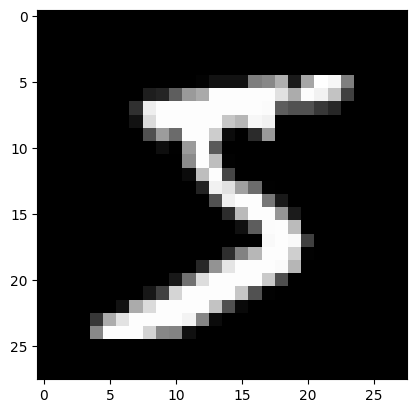

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap='gray')
print('Ground Truth: %s'%(y_train[0]))

In [6]:
# Normalize the image of the dataset
x_train = (x_train / 255) - 0.5
x_test = (x_test / 255) - 0.5

# Reshape the input data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# 3.

In [7]:
# Select 2000 random samples from the training set
train_samples = 2000
random_indices = np.random.choice(len(x_train), size=train_samples, replace=False)
x_train_subset = x_train[random_indices]
y_train_subset = y_train[random_indices]

# Select 1000 random samples from the test set
test_samples = 1000
random_indices = np.random.choice(len(x_test), size=test_samples, replace=False)
x_test_subset = x_test[random_indices]
y_test_subset = y_test[random_indices]

# Create DataStream Object for training subset
stream_train = DataStream(x_train_subset, y_train_subset)

# Create DataStream Object for test subset
stream_test = DataStream(x_test_subset, y_test_subset)

# 4, 5.

/usr/local/lib/python3.10/dist-packages/skmultiflow/meta/adaptive_random_forests.py:398: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_proba = np.asarray(y_proba)


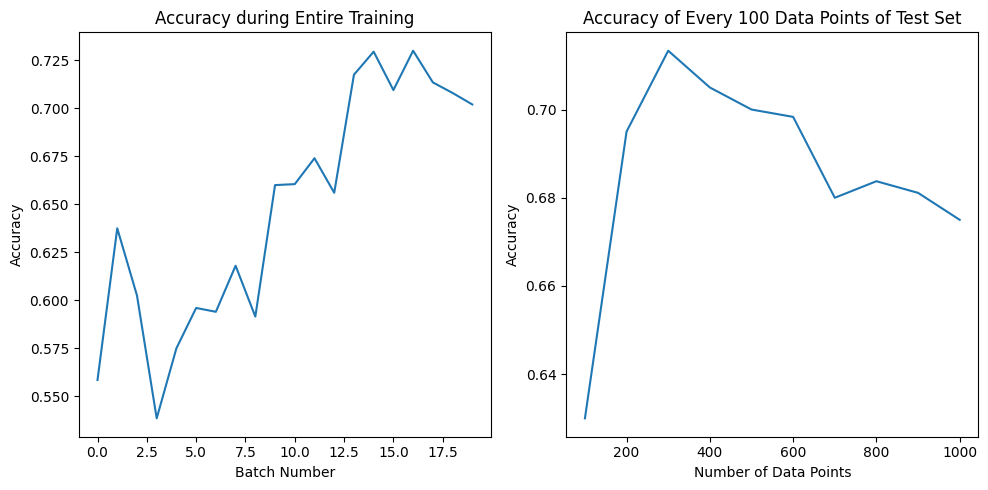

In [16]:
arf = AdaptiveRandomForestClassifier(n_estimators=5, max_features = 50)

batch_size = 100
n_samples_train = train_samples

accuracy_train = []
accuracy_test_last_100 = []
accuracy_test_every_100 = []

# Training phase
for i in range(0, n_samples_train, batch_size):
    X_batch, y_batch = x_train_subset[i:i+batch_size], y_train_subset[i:i+batch_size]
    arf.partial_fit(X_batch, y_batch, classes=np.unique(y_train_subset))

    # Calculate accuracy on the entire training set
    y_pred_train = arf.predict(x_train_subset)
    accuracy_train.append(np.mean(y_pred_train == y_train_subset))

# Testing phase
y_pred_test = arf.predict(x_test_subset)

# Calculate accuracy on every 100 data points of the test set
for i in range(100, test_samples + 1, 100):
    y_pred_every_100 = y_pred_test[:i]
    accuracy_test_every_100.append(np.mean(y_pred_every_100 == y_test_subset[:i]))

# Plot the accuracy diagrams
plt.figure(figsize=(10, 5))

# Accuracy during entire training
plt.subplot(1, 2, 1)
plt.plot(accuracy_train)
plt.title('Accuracy during Entire Training')
plt.xlabel('Batch Number')
plt.ylabel('Accuracy')

# Plot accuracy of every 100 data points of the test set
plt.subplot(1, 2, 2)
plt.plot(range(100, test_samples + 1, 100), accuracy_test_every_100)
plt.title('Accuracy of Every 100 Data Points of Test Set')
plt.xlabel('Number of Data Points')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


In [17]:
# Calculate accuracy on the test set
y_pred_test = arf.predict(x_test_subset)
accuracy_test = np.mean(y_pred_test == y_test_subset)

print('Accuracy on Test Set:', accuracy_test)


Accuracy on Test Set: 0.675
